In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148595,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148596,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148597,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148598,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [3]:
ger = df[df['Country'] == 'Germany']
ger=ger.reset_index()
ger.index +=1

In [4]:
ger_start =ger[ger['Date_reported']=='2020-02-29']
ger_start

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
58,48964,2020-02-29,DE,Germany,EURO,10,57,0,0


### Germany Original Wave 1 : 52 - 286
### After considering start as 50 cases:
### Germany Wave 1 : 58 - 286
### Split as:
### 58-95
### 96-286

In [5]:
ger_new = ger[57:620]
ger_new = ger_new.reset_index()
ger_new.index +=1
ger_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,58,48964,2020-02-29,DE,Germany,EURO,10,57,0,0
2,59,48965,2020-03-01,DE,Germany,EURO,54,111,0,0
3,60,48966,2020-03-02,DE,Germany,EURO,18,129,0,0
4,61,48967,2020-03-03,DE,Germany,EURO,28,157,0,0
5,62,48968,2020-03-04,DE,Germany,EURO,39,196,0,0
...,...,...,...,...,...,...,...,...,...,...
559,616,49522,2021-09-09,DE,Germany,EURO,15431,4046112,50,92498
560,617,49523,2021-09-10,DE,Germany,EURO,12969,4059081,55,92553
561,618,49524,2021-09-11,DE,Germany,EURO,11214,4070295,45,92598
562,619,49525,2021-09-12,DE,Germany,EURO,7345,4077640,8,92606


In [6]:
ger_pop = 83240000

ger_norm_case = ger_new['Cumulative_cases']/ger_pop

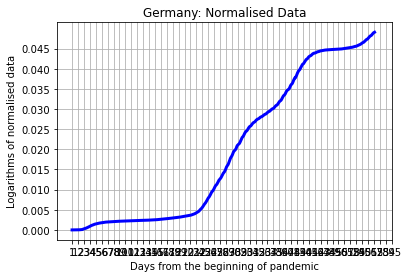

In [7]:
x1 = ger_new.index
y1 = ger_norm_case

plt.plot(x1,y1,color="blue",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(0,0.05,0.005))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Germany: Normalised Data')
plt.rcParams['figure.figsize'] = [32,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

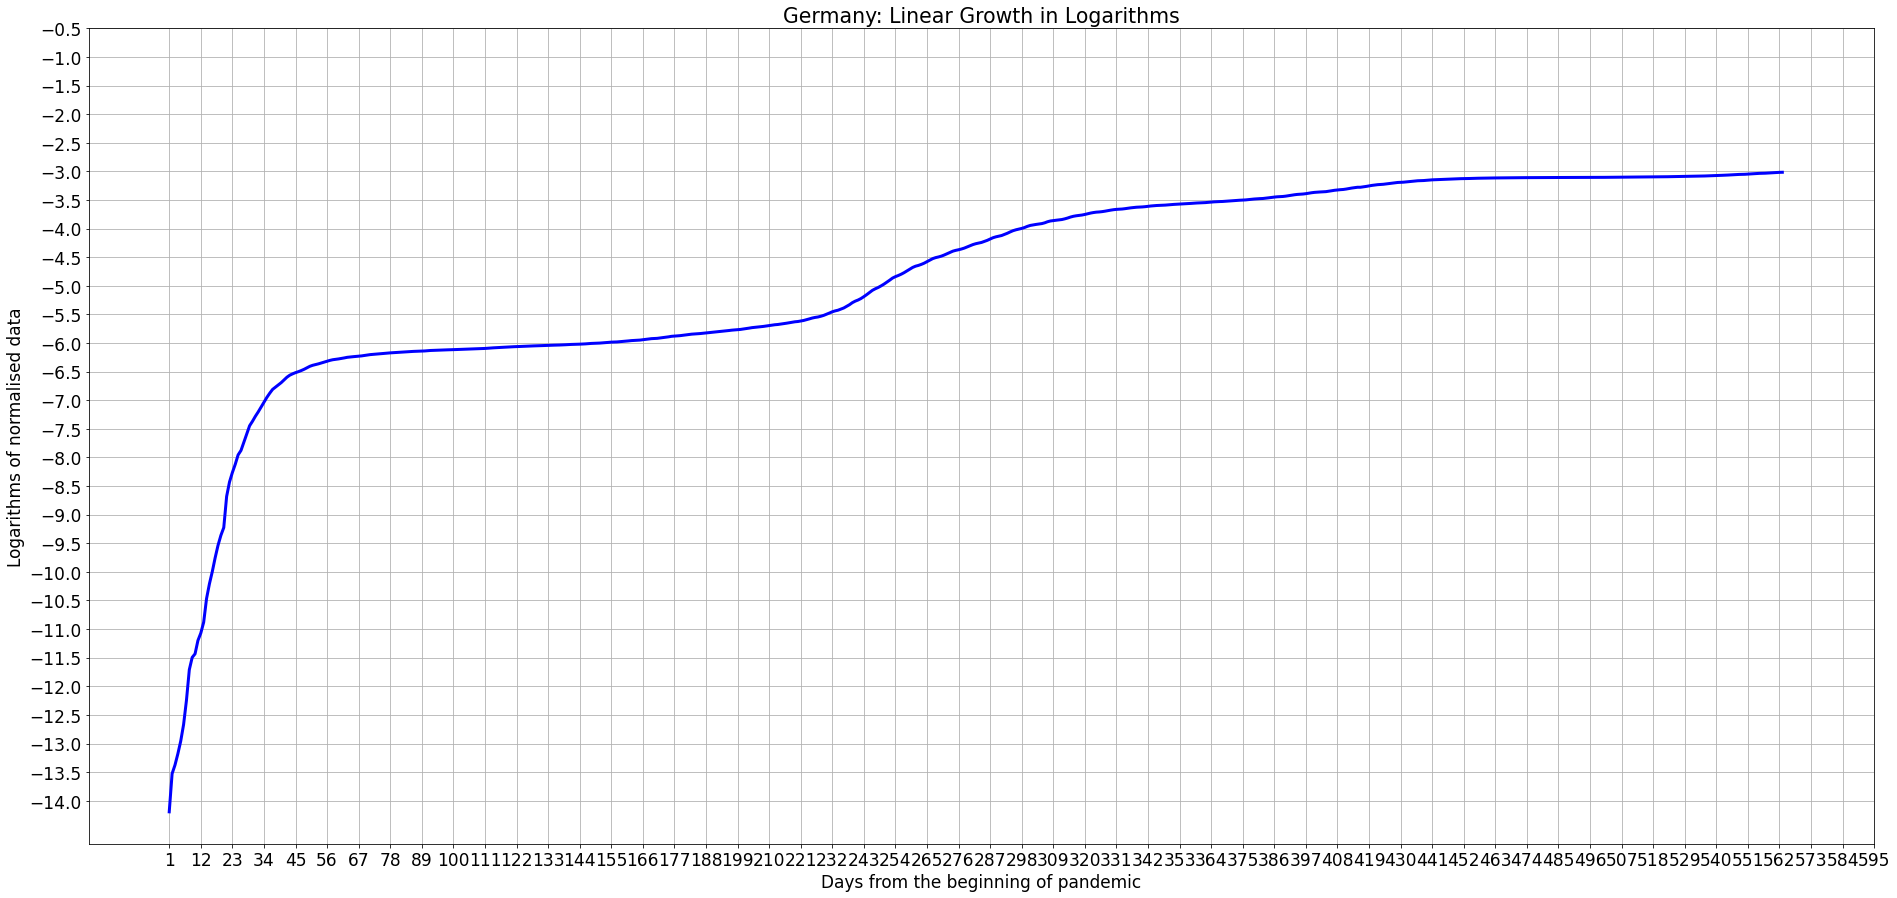

In [8]:
x1 = ger_new.index
y1 = np.log(ger_norm_case)

plt.plot(x1,y1,color="blue",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Germany: Linear Growth in Logarithms')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 1 : 1-38
### Interval 2 : 39 - 229
### Interval 3 : 1-229
### Interval 4: 1-563

In [9]:
x = ger_new.index.values
y= np.log(ger_norm_case)
x_int1 = x[:38]
y_int1 = y[:38]
x_int2 = x[38:229]
y_int2 = y[38:229]
x_int3 = x[:229]
y_int3 = y[:229]
x_int4 = x[:563]
y_int4 = y[:563]

#Interval 1
curve1 = np.polyfit(x_int1,y_int1,1)
r1= curve1[0]
c1= curve1[1]
print(r1,c1)

#Interval 2
curve2 = np.polyfit(x_int2,y_int2,1)
r2= curve2[0]
c2= curve2[1]
print(r2,c2)

#Interval 3
curve3 = np.polyfit(x_int3,y_int3,1)
r3= curve3[0]
c3= curve3[1]
print(r3,c3)

#Interval 4
curve4 = np.polyfit(x_int4,y_int4,1)
r4= curve4[0]
c4= curve4[1]
print(r4,c4)

print(x)

0.20219302192571031 -13.521548854162306
0.00415179659396571 -6.577020143269929
0.01623513349779421 -8.47814774329356
0.01005244548368058 -7.6582474775389455
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208

In [10]:
y1 = r1*x_int1 +c1
y2 = r2*x_int2 +c2
y3 = r3*x_int3 +c3
y4 = r4*x_int4 +c4

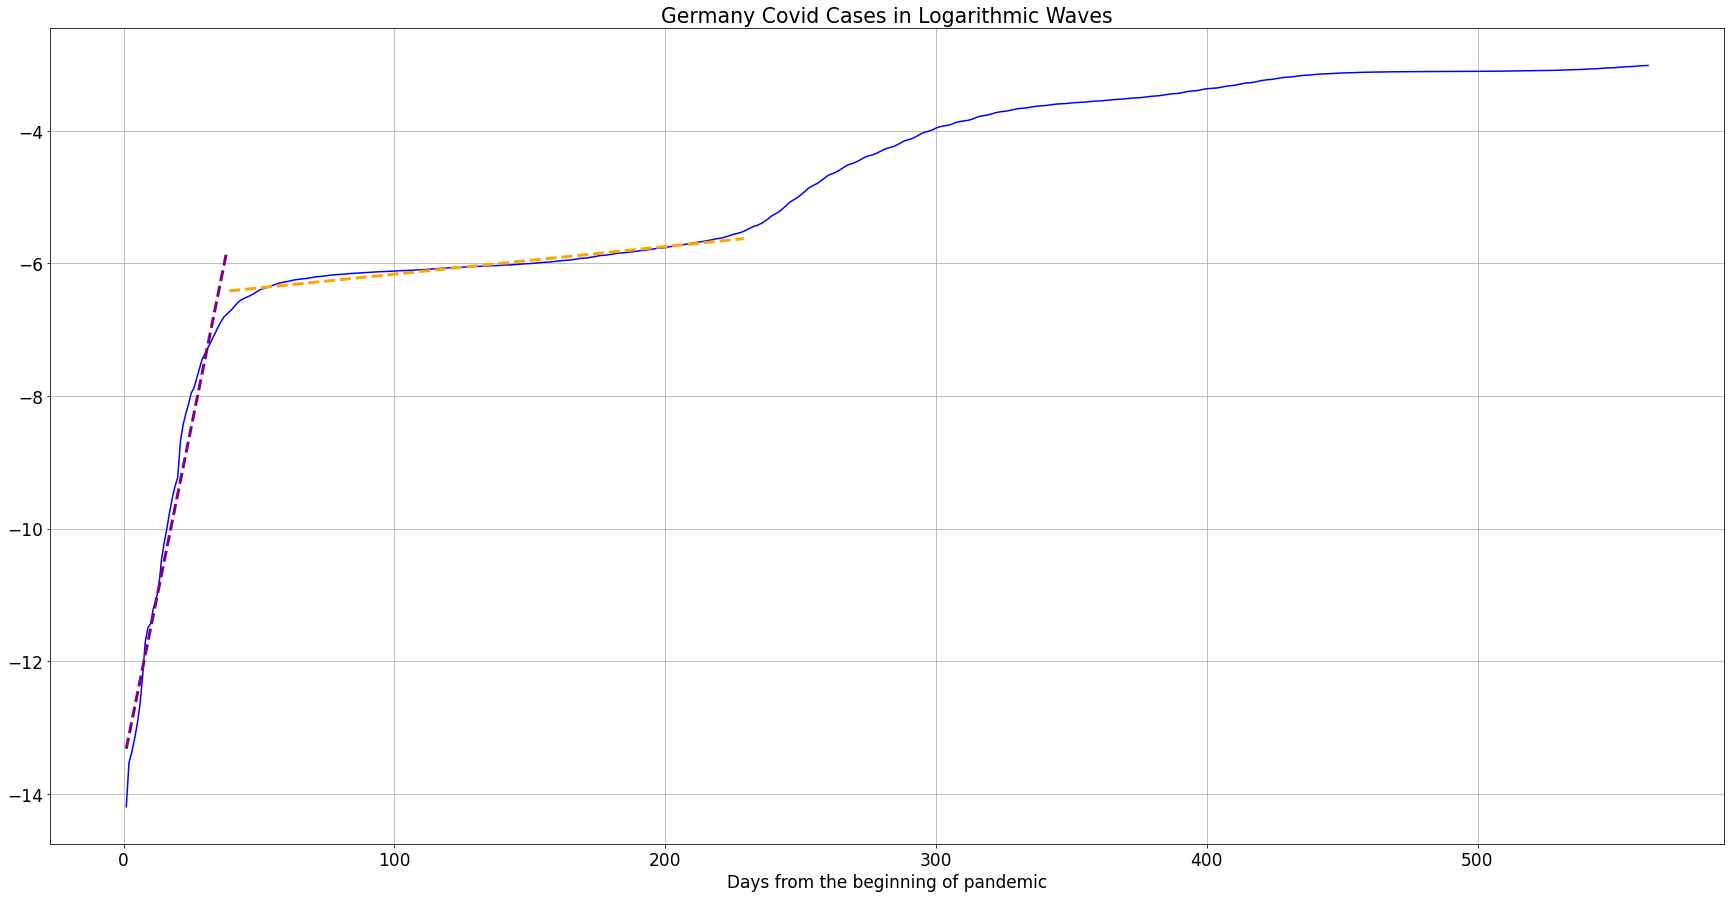

In [11]:
plt.plot(x,y,color="blue")
plt.plot(x_int1,y1,color="purple",linestyle="dashed",linewidth=3.0)
plt.plot(x_int2,y2,color="orange",linestyle="dashed",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,625,13))
#plt.yticks(np.arange(-19,1,1))
plt.title('Germany Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [12]:
waveEnd = 228
b=0.1
a1= r1+b
print(a1)

0.3021930219257103


In [13]:
from scipy.special import expit

obv_y = ger_norm_case[:38]
print(obv_y)

linreg = c1 + r1 * x_int1
expit(linreg)
exp_y = np.exp(linreg)
print(exp_y)

1     6.847669e-07
2     1.333494e-06
3     1.549736e-06
4     1.886112e-06
5     2.354637e-06
6     3.147525e-06
7     4.805382e-06
8     8.217203e-06
9     1.017540e-05
10    1.083614e-05
11    1.368333e-05
12    1.556944e-05
13    1.882508e-05
14    2.845988e-05
15    3.678520e-05
16    4.559106e-05
17    5.812110e-05
18    7.222489e-05
19    8.596828e-05
20    9.848630e-05
21    1.698462e-04
22    2.184887e-04
23    2.578448e-04
24    2.976213e-04
25    3.509370e-04
26    3.790726e-04
27    4.385872e-04
28    5.080250e-04
29    5.836377e-04
30    6.312710e-04
31    6.883469e-04
32    7.437890e-04
33    8.092984e-04
34    8.832532e-04
35    9.574243e-04
36    1.030490e-03
37    1.101802e-03
38    1.145975e-03
Name: Cumulative_cases, dtype: float64
[1.64239366e-06 2.01042823e-06 2.46093355e-06 3.01239002e-06
 3.68741921e-06 4.51371182e-06 5.52516360e-06 6.76326580e-06
 8.27880721e-06 1.01339576e-05 1.24048180e-05 1.51845425e-05
 1.85871594e-05 2.27522493e-05 2.78506703e-05 3.40915671

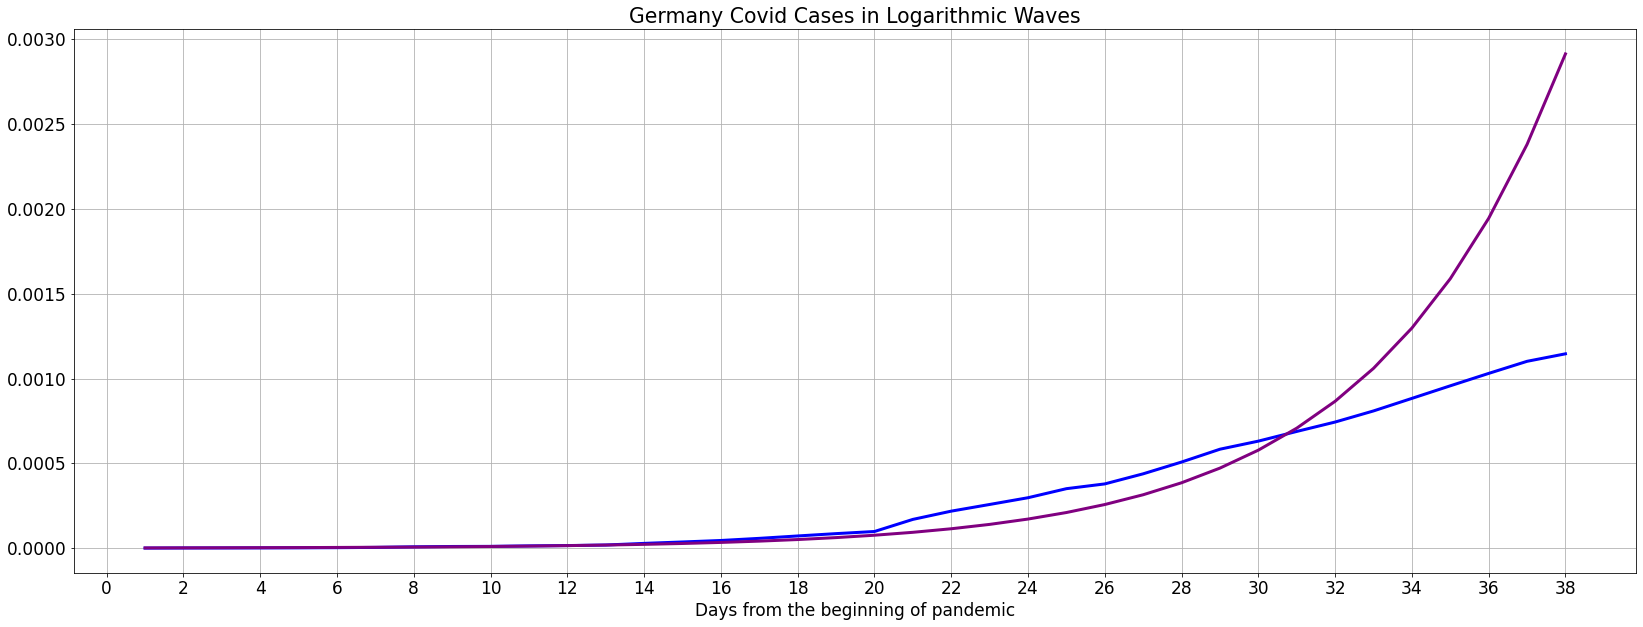

In [14]:
plt.plot(x_int1,obv_y,color="blue",linewidth=3.0)
plt.plot(x_int1,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,40,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Germany Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [15]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger['Cumulative_cases'][48]
R0 = day_10 / ger_pop
print(R0)
I0 = ger_new['Cumulative_cases'][1]/ger_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)

1.802018260451706e-07
5.045651129264776e-07
0.9999993152330611


In [16]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a1 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[:38]

In [17]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S0, R0], t_eval=x_int1)

In [18]:
p = 1 - sol.y[0, :]
print(inp.values)
MSE = np.mean(np.square(p - inp))

print(a,MSE)

[6.84766939e-07 1.33349351e-06 1.54973570e-06 1.88611245e-06
 2.35463719e-06 3.14752523e-06 4.80538203e-06 8.21720327e-06
 1.01753964e-05 1.08361365e-05 1.36833253e-05 1.55694378e-05
 1.88250841e-05 2.84598751e-05 3.67851994e-05 4.55910620e-05
 5.81210956e-05 7.22248919e-05 8.59682845e-05 9.84863047e-05
 1.69846228e-04 2.18488707e-04 2.57844786e-04 2.97621336e-04
 3.50937049e-04 3.79072561e-04 4.38587218e-04 5.08024988e-04
 5.83637674e-04 6.31271024e-04 6.88346949e-04 7.43789044e-04
 8.09298414e-04 8.83253244e-04 9.57424315e-04 1.03049015e-03
 1.10180202e-03 1.14597549e-03]


NameError: name 'a' is not defined

In [ ]:
plt.figure()
plt.plot(x_int1, inp.values, color="blue", label = 'Observed')
plt.plot(x_int1, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,40,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1-38')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 2: 39 - 229

In [ ]:
obv_y = ger_norm_case[38:229]

linreg = c2 + r2 * x_int2
expit(linreg)
exp_y = np.exp(linreg)

In [ ]:
b=0.1
a2= r2+b
print(a2)

In [ ]:
plt.plot(x_int2,obv_y,color="blue",linewidth=3.0)
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(30,240,5))
plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Germany Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [ ]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger_new['Cumulative_cases'][29]
R2 = day_10 / ger_pop
print(R2)
I2 = ger_new['Cumulative_cases'][29]/ger_pop - R2
print(I2)
S2 = 1- I2 - R2
print(S2)

In [ ]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a2 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[38:229]

In [ ]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S2, R2], t_eval=x_int2-38)

In [ ]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))
print(p)
print(a,MSE)

In [ ]:
plt.figure()
plt.plot(x_int2, inp.values, color="blue", label = 'Observed')
plt.plot(x_int2, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,240,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 39-229')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 3: 1 - 229

In [ ]:
obv_y = ger_norm_case[:229]

linreg = c3 + r3 * x_int3
expit(linreg)
exp_y = np.exp(linreg)

In [ ]:
b=0.1
a3= r3+b
print(a3)

In [ ]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger['Cumulative_cases'][48]
R3 = day_10 / ger_pop
print(R3)
I3 = ger_new['Cumulative_cases'][1]/ger_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)

In [ ]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a3 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[:229]

In [ ]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S3, R3], t_eval=x_int3)

In [ ]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a,MSE)

In [ ]:
plt.figure()
plt.plot(x_int3, inp.values, color="blue", label = 'Observed')
plt.plot(x_int3, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,240,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1-229')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 4: 1 - 563

In [ ]:
b=0.1
a4= r4+b
print(a4)

In [ ]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger['Cumulative_cases'][48]
R4 = day_10 / ger_pop
print(R4)
I4 = ger_new['Cumulative_cases'][1]/ger_pop - R4
print(I4)
S4 = 1- I4 - R4
print(S4)

In [ ]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a4 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[:563]

In [ ]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S4, R4], t_eval=x_int4)

In [ ]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a,MSE)

In [ ]:
plt.figure()
plt.plot(x_int4, inp.values, color="blue", label = 'Observed')
plt.plot(x_int4, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,580,15))
plt.yticks(np.arange(0,0.06,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1-563')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()